In [139]:
import pandas as pd
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [140]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Dropping the non numerical columns for the ease. I am not doing feature engineering as here my focus is to demonstrate ROC curve and AUC**

In [141]:
data= data.drop(['Ad Topic Line','City','Country', 'Timestamp'], axis =1)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [142]:
X = data.drop(['Clicked on Ad'], axis =1 )
y = data['Clicked on Ad']
print(X.shape)
print(y.shape)

(1000, 5)
(1000,)


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
print(X_train)

[[-0.5281241   0.1981716   0.49398676 -1.48081757 -0.96591391]
 [-1.63798195  0.1981716  -1.37473758 -0.91586526  1.03528895]
 [-1.5174544  -0.36695654 -0.47903647 -1.01831421  1.03528895]
 ...
 [ 1.65204349  0.98935101 -0.22898187  0.04199813  1.03528895]
 [-0.5268686   0.65027412  1.31351945 -0.94438668 -0.96591391]
 [ 1.56039234  0.42422286  0.34103109  0.30622058 -0.96591391]]


In [145]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.decision_function(X_test)


## Plot ROC

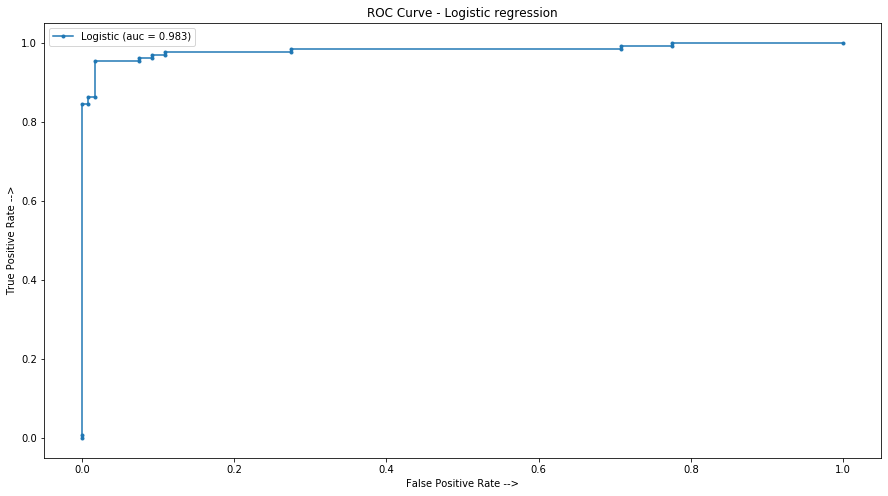

In [146]:
'''
logistic_fpr -> False positive rate
logistic_tpr -> True positive rate
'''
logistic_fpr , logistic_tpr, logistic_threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr , logistic_tpr)

plt.figure(figsize = (15,8))
plt.plot(logistic_fpr , logistic_tpr, linestyle = '-', marker='.', label = 'Logistic (auc = %0.3f)' % auc_logistic)

plt.title('ROC Curve - Logistic regression')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend();

## Random Forest


In [147]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict_proba(X_test)
score = roc_auc_score(y_test, rf_pred[:,1])
print(score)

0.9849358974358974


## Adaboost Classifier

In [148]:
from sklearn.ensemble import AdaBoostClassifier
ab_model=AdaBoostClassifier()
ab_model.fit(X_train, y_train)
ab_pred = ab_model.predict_proba(X_test)
score=roc_auc_score(y_test,ab_pred[:,1])
print(score)

0.9781089743589744


In [149]:
rf_pred= pd.Series(rf_pred[:,1])
ab_pred= pd.Series(ab_pred[:,1])


In [154]:
all_pred = pd.concat([rf_pred,ab_pred], axis =1)
final_pred = all_pred.mean(axis=1)
score=roc_auc_score(y_test,final_pred)
print(score)


0.9842948717948717


In [156]:
fpr , tpr, threshold = roc_curve(y_test, final_pred)
auc_logistic = auc(fpr , tpr)


In [152]:
from sklearn.metrics import accuracy_score
import numpy as np
accuracy=[]
for thres in threshold:
    y_pred = np.where(final_pred > thres,1,0)
    accuracy.append(accuracy_score(y_test,y_pred,normalize =True))

results = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis =1)
print(results)

## from the results we can check which threshold is giving the maximum accuracy

           0      1
0   1.961904  0.480
1   0.961904  0.480
2   0.927319  0.488
3   0.924437  0.492
4   0.923275  0.508
5   0.923095  0.512
6   0.921667  0.524
7   0.920470  0.528
8   0.917595  0.536
9   0.917252  0.556
10  0.916156  0.560
11  0.876264  0.624
12  0.872866  0.628
13  0.866280  0.660
14  0.865726  0.664
15  0.860601  0.704
16  0.859450  0.716
17  0.855413  0.732
18  0.854868  0.736
19  0.793101  0.904
20  0.787784  0.908
21  0.697056  0.932
22  0.691585  0.936
23  0.677536  0.932
24  0.675081  0.936
25  0.585400  0.944
26  0.523062  0.944
27  0.498818  0.948
28  0.464876  0.944
29  0.452809  0.940
30  0.421394  0.940
31  0.419353  0.940
32  0.307871  0.928
33  0.305551  0.924
34  0.264918  0.884
35  0.264179  0.880
36  0.246880  0.832
37  0.246483  0.828
38  0.235362  0.800
39  0.235281  0.796
40  0.230743  0.752
41  0.230000  0.740
42  0.229504  0.732
43  0.229392  0.712
44  0.227569  0.680
45  0.227545  0.676
46  0.226741  0.664
47  0.225167  0.660
48  0.225131  0.644
